In [22]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
sns.set_style('whitegrid')
%matplotlib inline

In [38]:
Echo58v4ah = pd.read_csv (r'ECHO PO AvgPos vs Days 58V4AH 2020-03-01--2020-06-30.csv')
Echo58v4ah.tail()

,Days,AvgPos
103,115,-12
104,116,-15
105,117,-17
106,118,-14
107,119,-16


In [24]:
# Set up X1 as median Impressions
X1 = Echo58v4ah.Days

X1 = np.vstack(Echo58v4ah.Days)

# Set up Y as the target Average Position.
Y = Echo58v4ah.AvgPos



In [25]:





A = X1*[1,0]

X = A + [0,1]

X


array([[  0,   1],
       [  1,   1],
       [  2,   1],
       [  4,   1],
       [  5,   1],
       [  7,   1],
       [  8,   1],
       [  9,   1],
       [ 10,   1],
       [ 11,   1],
       [ 12,   1],
       [ 13,   1],
       [ 14,   1],
       [ 16,   1],
       [ 17,   1],
       [ 20,   1],
       [ 22,   1],
       [ 23,   1],
       [ 24,   1],
       [ 26,   1],
       [ 27,   1],
       [ 29,   1],
       [ 30,   1],
       [ 31,   1],
       [ 32,   1],
       [ 33,   1],
       [ 34,   1],
       [ 36,   1],
       [ 37,   1],
       [ 38,   1],
       [ 39,   1],
       [ 40,   1],
       [ 41,   1],
       [ 42,   1],
       [ 43,   1],
       [ 44,   1],
       [ 45,   1],
       [ 46,   1],
       [ 47,   1],
       [ 48,   1],
       [ 49,   1],
       [ 50,   1],
       [ 51,   1],
       [ 52,   1],
       [ 53,   1],
       [ 54,   1],
       [ 57,   1],
       [ 58,   1],
       [ 59,   1],
       [ 60,   1],
       [ 61,   1],
       [ 62,   1],
       [ 63,

In [26]:
m , b = np.linalg.lstsq(X,Y,rcond=None)[0]
m , b

(0.08023946505467325, -28.89505082214001)

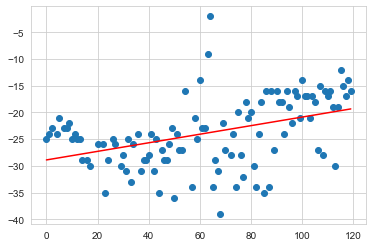

In [27]:
# First the original points, AvgPos vs Days
plt.plot(Echo58v4ah.Days,Echo58v4ah.AvgPos,'o')

# Next the best fit line
x= Echo58v4ah.Days
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [28]:
import sklearn
from sklearn.linear_model import LinearRegression

In [29]:
lreg = LinearRegression()

In [30]:
from sklearn.model_selection import cross_validate

In [31]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y)

In [32]:
# Print shapes of the training and testing data sets
print(X_train.shape) 
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(81, 2)
(27, 2)
(81,)
(27,)


In [33]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [35]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 32.93
Fit a model X_train, and calculate MSE with X_test and Y_test: 42.23


Text(0.5, 1.0, 'Residual Plots')

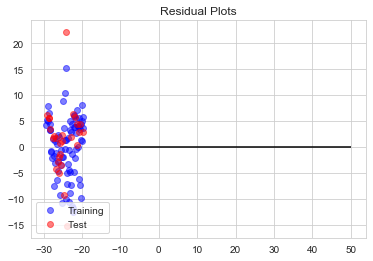

In [36]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

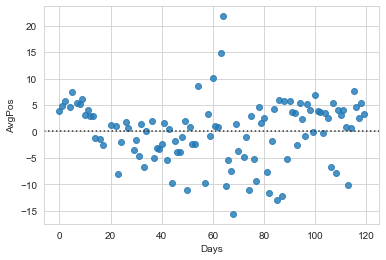

In [37]:
# Residual plot of all the dataset using seaborn
sns.residplot('Days', 'AvgPos', data = Echo58v4ah)